In [1]:
import os
import sys

import numpy  as np
import tables as tb
import pandas as pd
import matplotlib
import math

#the line below makes the plot as a pop-up, that can be saved
#matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import matplotlib.cm as cm
from matplotlib.colors import Normalize

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.core.exceptions import NoHits

In [2]:
import functions.histo_functions as myhf
import functions.efficiency_functions as myef
import functions.recovstrue as myrvt

In [3]:
npz_path = '/Users/halmamol/NEXT/NBarrays/'
npz_filename_DS_r21 = 'fom_DETSIM.npz'
npz_filename_DS_r18_tb = 'fom_DETSIM_R18mm_tb.npz' 
npz_filename_DS_r21_tb = 'fom_DETSIM_R21mm_tb.npz'
npz_filename_DS_r18_oec = 'fom_DETSIM_R18mm_oec.npz'
npz_filename_DS_r21_oec = 'fom_DETSIM_R21mm_oec.npz'
npz_filename_DS_r18_tb0050 = 'fom_DETSIM_R18mm_tb0050.npz' 
npz_filename_DS_r21_tb0050 = 'fom_DETSIM_R21mm_tb0050.npz'

In [4]:
d_DS_r18_tb = np.load(npz_path+npz_filename_DS_r18_tb)
d_DS_r21 = np.load(npz_path+npz_filename_DS_r21)
d_DS_r21_tb = np.load(npz_path+npz_filename_DS_r21_tb)
d_DS_r18_oec = np.load(npz_path+npz_filename_DS_r18_oec)
d_DS_r21_oec = np.load(npz_path+npz_filename_DS_r21_oec)

e_DS_r18_tb = d_DS_r18_tb['e']
b_DS_r18_tb = d_DS_r18_tb['b']
eE_DS_r18_tb = d_DS_r18_tb['e_error']
bE_DS_r18_tb = d_DS_r18_tb['b_error']
fom_DS_r18_tb = d_DS_r18_tb['fom']
fomE_DS_r18_tb = d_DS_r18_tb['fom_error']
blobcut_DS_r18_tb = d_DS_r18_tb['blobcut_energy']

e_DS_r21 = d_DS_r21['e']
b_DS_r21 = d_DS_r21['b']
eE_DS_r21 = d_DS_r21['e_error']
bE_DS_r21 = d_DS_r21['b_error']
fom_DS_r21 = d_DS_r21['fom']
fomE_DS_r21 = d_DS_r21['fom_error']
blobcut_DS_r21 = d_DS_r21['blobcut_energy']

e_DS_r21_tb = d_DS_r21_tb['e']
b_DS_r21_tb = d_DS_r21_tb['b']
eE_DS_r21_tb = d_DS_r21_tb['e_error']
bE_DS_r21_tb = d_DS_r21_tb['b_error']
fom_DS_r21_tb = d_DS_r21_tb['fom']
fomE_DS_r21_tb = d_DS_r21_tb['fom_error']
blobcut_DS_r21_tb = d_DS_r21_tb['blobcut_energy']

e_DS_r18_oec = d_DS_r18_oec['e']
b_DS_r18_oec = d_DS_r18_oec['b']
eE_DS_r18_oec = d_DS_r18_oec['e_error']
bE_DS_r18_oec = d_DS_r18_oec['b_error']
fom_DS_r18_oec = d_DS_r18_oec['fom']
fomE_DS_r18_oec = d_DS_r18_oec['fom_error']
blobcut_DS_r18_oec = d_DS_r18_oec['blobcut_energy']

e_DS_r21_oec = d_DS_r21_oec['e']
b_DS_r21_oec = d_DS_r21_oec['b']
eE_DS_r21_oec = d_DS_r21_oec['e_error']
bE_DS_r21_oec = d_DS_r21_oec['b_error']
fom_DS_r21_oec = d_DS_r21_oec['fom']
fomE_DS_r21_oec = d_DS_r21_oec['fom_error']
blobcut_DS_r21_oec = d_DS_r21_oec['blobcut_energy']

In [5]:
d_DS_r18_tb0050 = np.load(npz_path+npz_filename_DS_r18_tb0050)
d_DS_r21_tb0050 = np.load(npz_path+npz_filename_DS_r21_tb0050)

e_DS_r18_tb0050 = d_DS_r18_tb0050['e']
b_DS_r18_tb0050 = d_DS_r18_tb0050['b']
eE_DS_r18_tb0050 = d_DS_r18_tb0050['e_error']
bE_DS_r18_tb0050 = d_DS_r18_tb0050['b_error']
fom_DS_r18_tb0050 = d_DS_r18_tb0050['fom']
fomE_DS_r18_tb0050 = d_DS_r18_tb0050['fom_error']
blobcut_DS_r18_tb0050 = d_DS_r18_tb0050['blobcut_energy']

e_DS_r21_tb0050 = d_DS_r21_tb0050['e']
b_DS_r21_tb0050 = d_DS_r21_tb0050['b']
eE_DS_r21_tb0050 = d_DS_r21_tb0050['e_error']
bE_DS_r21_tb0050 = d_DS_r21_tb0050['b_error']
fom_DS_r21_tb0050 = d_DS_r21_tb0050['fom']
fomE_DS_r21_tb0050 = d_DS_r21_tb0050['fom_error']
blobcut_DS_r21_tb0050 = d_DS_r21_tb0050['blobcut_energy']

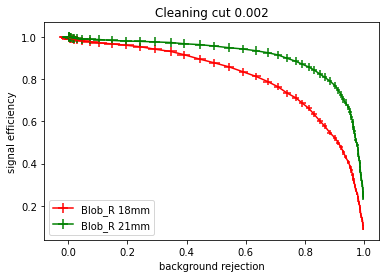

In [6]:
fig, ax = plt.subplots()
ax.errorbar(1-b_DS_r18_tb,e_DS_r18_tb, xerr=bE_DS_r18_tb, yerr=eE_DS_r18_tb, fmt = '-r', label = 'Blob_R 18mm')
ax.errorbar(1-b_DS_r18_tb,e_DS_r21_tb, xerr=bE_DS_r21_tb, yerr=eE_DS_r21_tb, fmt = '-g', label = 'Blob_R 21mm')
plt.title('Cleaning cut 0.002')
plt.ylabel('signal efficiency')
plt.xlabel('background rejection')
plt.legend(loc=3);
#plt.title('Cut efficiency')

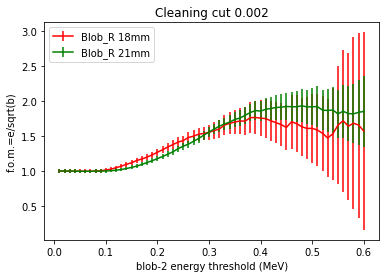

In [7]:
fig, ax = plt.subplots()
ax.errorbar(blobcut_DS_r18_tb,fom_DS_r18_tb, yerr=fomE_DS_r18_tb,fmt = '-r', label = 'Blob_R 18mm')
ax.errorbar(blobcut_DS_r21_tb,fom_DS_r21_tb, yerr=fomE_DS_r21_tb,fmt = '-g', label = 'Blob_R 21mm')
plt.title('Cleaning cut 0.002')
plt.xlabel('blob-2 energy threshold (MeV)')
plt.ylabel('f.o.m.=e/sqrt(b)')
plt.legend(loc=2);

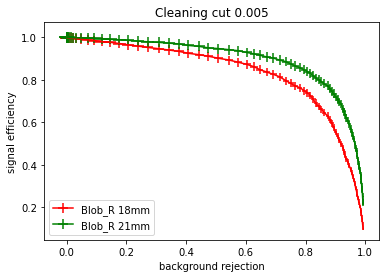

In [8]:
fig, ax = plt.subplots()
ax.errorbar(1-b_DS_r18_tb0050,e_DS_r18_tb0050, xerr=bE_DS_r18_tb0050, yerr=eE_DS_r18_tb0050, fmt = '-r', label = 'Blob_R 18mm')
ax.errorbar(1-b_DS_r18_tb0050,e_DS_r21_tb0050, xerr=bE_DS_r21_tb0050, yerr=eE_DS_r21_tb0050, fmt = '-g', label = 'Blob_R 21mm')
plt.title('Cleaning cut 0.005')
plt.ylabel('signal efficiency')
plt.xlabel('background rejection')
plt.legend(loc=3);
#plt.title('Cut efficiency')

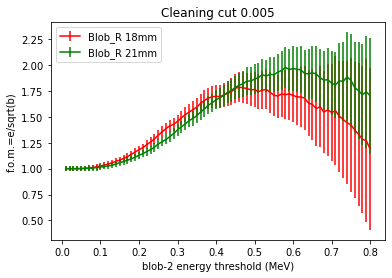

In [9]:
fig, ax = plt.subplots()
ax.errorbar(blobcut_DS_r18_tb0050,fom_DS_r18_tb0050, yerr=fomE_DS_r18_tb0050,fmt = '-r', label = 'Blob_R 18mm')
ax.errorbar(blobcut_DS_r21_tb0050,fom_DS_r21_tb0050, yerr=fomE_DS_r21_tb0050,fmt = '-g', label = 'Blob_R 21mm')
plt.title('Cleaning cut 0.005')
plt.xlabel('blob-2 energy threshold (MeV)')
plt.ylabel('f.o.m.=e/sqrt(b)')
plt.legend(loc=2);

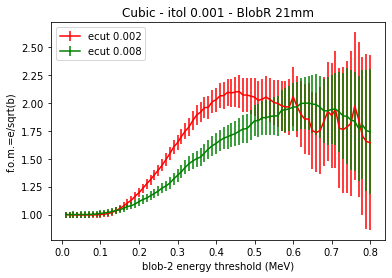

In [10]:
fig, ax = plt.subplots()
ax.errorbar(blobcut_DS_r21,fom_DS_r21, yerr=fomE_DS_r18_tb0050,fmt = '-r', label = 'ecut 0.002')
ax.errorbar(blobcut_DS_r21_oec,fom_DS_r21_oec, yerr=fomE_DS_r21_tb0050,fmt = '-g', label = 'ecut 0.008')
plt.title('Cubic - itol 0.001 - BlobR 21mm')
plt.xlabel('blob-2 energy threshold (MeV)')
plt.ylabel('f.o.m.=e/sqrt(b)')
plt.legend(loc=2);

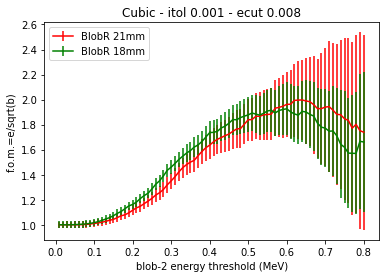

In [12]:
fig, ax = plt.subplots()
ax.errorbar(blobcut_DS_r21_oec,fom_DS_r21_oec, yerr=fomE_DS_r18_tb0050,fmt = '-r', label = 'BlobR 21mm')
ax.errorbar(blobcut_DS_r18_oec,fom_DS_r18_oec, yerr=fomE_DS_r21_tb0050,fmt = '-g', label = 'BlobR 18mm')
plt.title('Cubic - itol 0.001 - ecut 0.008')
plt.xlabel('blob-2 energy threshold (MeV)')
plt.ylabel('f.o.m.=e/sqrt(b)')
plt.legend(loc=2);